In [13]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
sns.set()

In [14]:
# Load dataset
gastos_diretos = pd.read_csv('../databases/gastosdiretos.csv', encoding='utf-8')

# Testes de Hipótese

## Teste 1
Hipótese nula (H0): As categorias econômicas não afetam significativamente os gastos realizados.

Hipótese alternativa (H1): As categorias econômicas afetam significativamente os gastos realizados.

In [15]:
gastos_realizados = gastos_diretos[['NOME CATEGORIA ECONÔMICA', 'ORÇAMENTO REALIZADO (R$)', 'Year']]

gastos_categoria = gastos_realizados.groupby('NOME CATEGORIA ECONÔMICA')\
    .agg({'ORÇAMENTO REALIZADO (R$)': ['sum', 'mean']})\
    .reset_index()

gastos_categoria.columns = ['NOME CATEGORIA ECONÔMICA', 'TOTAL_GASTOS', 'MEDIA_GASTOS']

media_total_gastos = gastos_realizados['ORÇAMENTO REALIZADO (R$)'].mean()

gastos_categoria['PORCENTAGEM_GASTOS'] = (gastos_categoria['TOTAL_GASTOS'] / gastos_realizados['ORÇAMENTO REALIZADO (R$)'].sum()) * 100

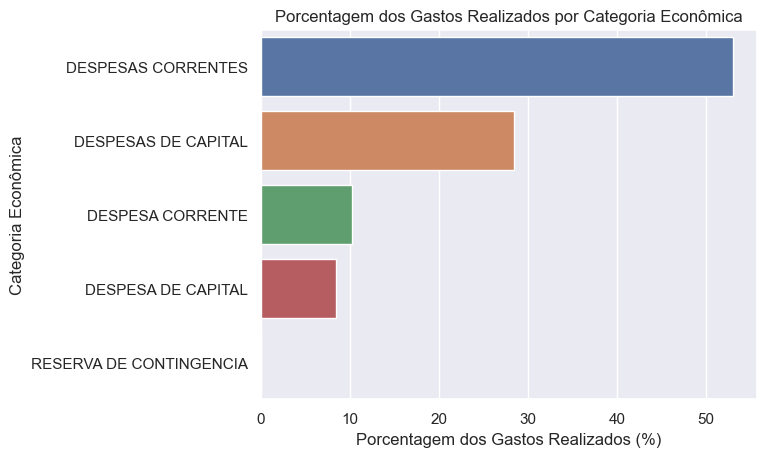

In [16]:
gastos_categoria = gastos_categoria.sort_values('PORCENTAGEM_GASTOS', ascending=False)
sns.barplot(x='PORCENTAGEM_GASTOS', y='NOME CATEGORIA ECONÔMICA', data=gastos_categoria)

plt.title("Porcentagem dos Gastos Realizados por Categoria Econômica")
plt.xlabel('Porcentagem dos Gastos Realizados (%)')
plt.ylabel('Categoria Econômica')
plt.savefig('../resultados/gastos_por_categoria.png', bbox_inches='tight')
plt.show()

# Intervalos de Confiança

Intervalos de confiança com base nos gastos realizados por categorias econômicas em estados que possuem ou não uma determinada característica